In [74]:
from keras.datasets import imdb

Data Preparation!


In [75]:
((X_train, Y_train),(X_test, Y_test)) = imdb.load_data(num_words=10000)

This will load 10000 most commonly used words on IMDB reviews.

In [76]:
X_train.shape

(25000,)

In [77]:
X_test.shape

(25000,)

Keras convert text to numners as per decided by keras dictionary (as known as Tokenization)

In [78]:
word_idx = imdb.get_word_index()

In [79]:
idx_word = dict([val,key] for (key,val) in word_idx.items())

In [80]:
actual_review = ' '.join([idx_word.get(idx-3,'#') for idx in X_train[0]])

In [81]:
print("Sentence for X_train[0]")
print(actual_review)

Sentence for X_train[0]
# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they

In [82]:
import numpy as np

Vectorization: So we will convert this every sentence in vector of size 10,000 in form of zeros and ones.

In [83]:
def vectorise_sentences(sentences, dim = 10000):
  output = np.zeros((len(sentences), dim))
  for i, word in enumerate(sentences):
    output[i,word] = 1
  return output

In [84]:
XT = X_train
Xt = X_test
X_train = vectorise_sentences(XT)
X_test = vectorise_sentences(Xt)

In [85]:
YT = Y_train
Yt = Y_test
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

Data Prepared, now define your model Architecture

Input Layer --> Hidden layers --> Output Layer(Using Sigmoid Activation)

In [86]:
from keras import models
from keras.layers import Dense

In [87]:
model = models.Sequential()
model.add(Dense(16,activation='relu', input_shape = (10000,)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [88]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [90]:
X_val = X_train[:5000]
X_train_new = X_train[5000:]
Y_val = Y_train[:5000]
Y_train_new = Y_train[5000:]

In [91]:
hist = model.fit(X_train_new, Y_train_new, epochs=4, batch_size=512, validation_data= (X_val, Y_val))

Epoch 1/4
40/40 [==============================] - 1s 27ms/step - loss: 0.4776 - accuracy: 0.8066 - val_loss: 0.3550 - val_accuracy: 0.8706
Epoch 2/4
40/40 [==============================] - 1s 21ms/step - loss: 0.2735 - accuracy: 0.9068 - val_loss: 0.3178 - val_accuracy: 0.8716
Epoch 3/4
40/40 [==============================] - 1s 31ms/step - loss: 0.2037 - accuracy: 0.9300 - val_loss: 0.2707 - val_accuracy: 0.8944
Epoch 4/4
40/40 [==============================] - 1s 21ms/step - loss: 0.1646 - accuracy: 0.9436 - val_loss: 0.2795 - val_accuracy: 0.8926


In [92]:
hist.history.items()

dict_items([('loss', [0.47759878635406494, 0.2735440731048584, 0.2036592662334442, 0.1646166890859604]), ('accuracy', [0.8065500259399414, 0.9067500233650208, 0.9300000071525574, 0.9435999989509583]), ('val_loss', [0.35495367646217346, 0.3178080916404724, 0.27074986696243286, 0.27950215339660645]), ('val_accuracy', [0.8705999851226807, 0.8715999722480774, 0.8944000005722046, 0.8925999999046326])])

Visualise the results

In [93]:
import matplotlib.pyplot as plt

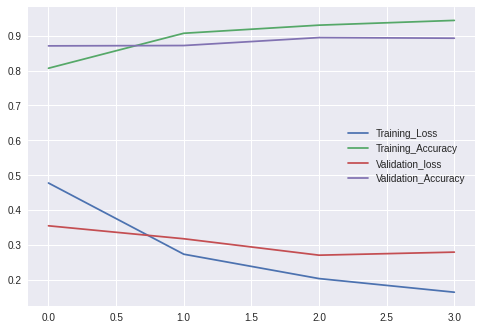

In [94]:
plt.plot(hist.history['loss'], label = 'Training_Loss')
plt.plot(hist.history['accuracy'], label = 'Training_Accuracy')
plt.plot(hist.history['val_loss'], label = 'Validation_loss')
plt.plot(hist.history['val_accuracy'], label = 'Validation_Accuracy')
plt.style.use('seaborn')
plt.legend()
plt.show()

In [95]:
print("Accuracy = ",model.evaluate(X_test, Y_test)[1])

782/782 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.8786
Accuracy =  0.8785600066184998


In [96]:
model.predict(X_test)

array([[0.16410184],
       [0.9999049 ],
       [0.75328207],
       ...,
       [0.09432393],
       [0.06690943],
       [0.53095764]], dtype=float32)